In [1]:
!pip install sudachipy
!pip install sudachidict_core
!pip install transformers
!pip install tf-keras~=2.16

In [3]:
from sudachipy import tokenizer
from sudachipy import dictionary
from transformers import pipeline

In [5]:
# Sudachiインスタンス作成
tokenizer_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C  # 詳細モード

In [7]:
# テキスト
text = "あなたの発言は非常に失礼で、受け入れられないものです。"

In [9]:
# SudachiPyで形態素解析
tokens = [token.surface() for token in tokenizer_obj.tokenize(text, mode) if token.surface() != ""]
print("形態素解析結果:", tokens)

形態素解析結果: ['あなた', 'の', '発言', 'は', '非常', 'に', '失礼', 'で', '、', '受け入れ', 'られ', 'ない', 'もの', 'です', '。']


In [27]:
# 有害性検出モデル
classifier = pipeline("text-classification", model="unitary/toxic-bert")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [41]:
# スコアリストの準備
toxicity_scores = []


In [51]:
# 分割された単語ごとに有害性を検出
# スコアリストの準備
toxicity_scores = []

# 分割された単語ごとに有害性と感情を検出
for token in tokens:
    # 有害性検出
    toxicity_result = toxicity_classifier(token)
    toxicity_score = toxicity_result[0]['score']
    toxicity_scores.append(toxicity_score)

    print(f"単語: {token}")
    print(f"  有害性スコア: {toxicity_score}")

単語: あなた
  有害性スコア: 0.0007685829768888652
単語: の
  有害性スコア: 0.0009658244089223444
単語: 発言
  有害性スコア: 0.0012355254730209708
単語: は
  有害性スコア: 0.0009561330662108958
単語: 非常
  有害性スコア: 0.011535150930285454
単語: に
  有害性スコア: 0.0009511485695838928
単語: 失礼
  有害性スコア: 0.011535150930285454
単語: で
  有害性スコア: 0.0009430053760297596
単語: 、
  有害性スコア: 0.0009492749813944101
単語: 受け入れ
  有害性スコア: 0.0013194801285862923
単語: られ
  有害性スコア: 0.000767198100220412
単語: ない
  有害性スコア: 0.0008037105435505509
単語: もの
  有害性スコア: 0.0007604753482155502
単語: です
  有害性スコア: 0.0007557937642559409
単語: 。
  有害性スコア: 0.0009466102346777916


In [53]:
# ラインチャートの作成
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

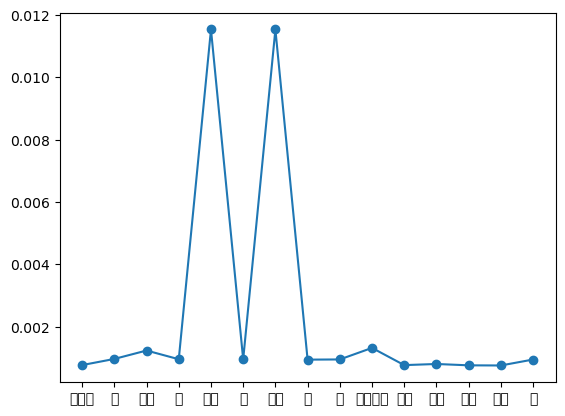

In [55]:
# 有害性スコアのプロット
plt.plot(tokens, toxicity_scores, label="有害性スコア (Toxicity)", marker="o")
